# Big Data for Health (CSE6250) 

Goal: Using Support Vector Machine model to predict sepsis onset using MIMIC III Data

Author: Caleb Sabatini

## Support Vector Machine - Model Evaluation

Train/Test data size: 4885/543
______________________________________________
Classifier: SVM
Accuracy:  0.8729
AUC:  0.6521
AUPRC:  0.1959
Precision:  0.2857
Recall:  0.0635
F1-score:  0.1039
______________________________________________



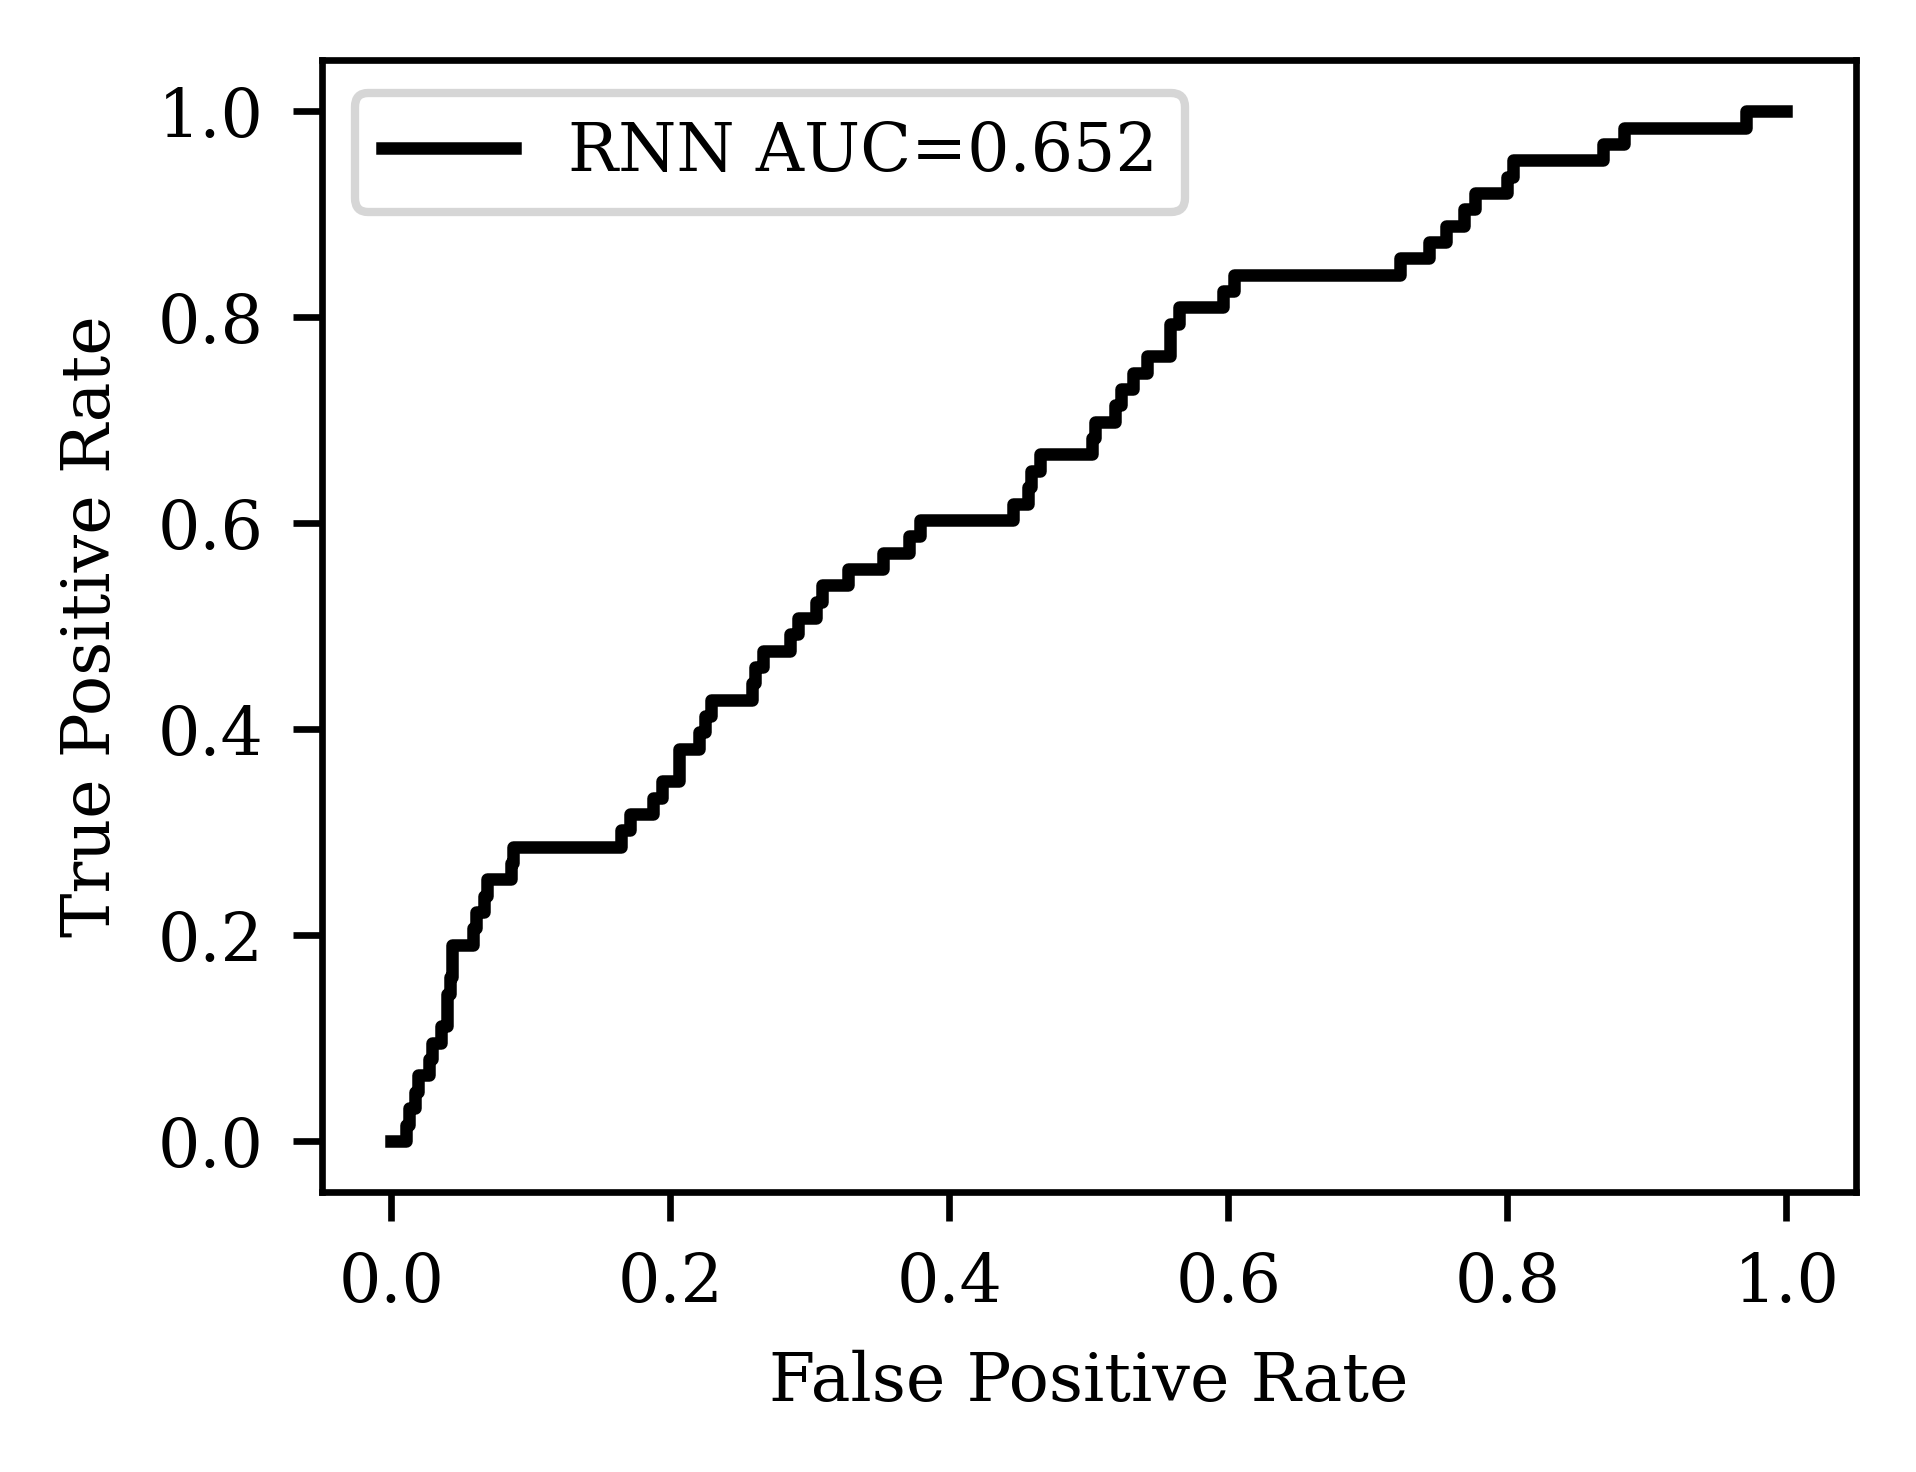

In [16]:
from Python.model_data import model_data
from Python.utils import classification_metrics, plot_roc

from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV

df_train, df_test = model_data(model_type="SVM", test_size=.1)
x_train, y_train = df_train.drop(columns=['label']), df_train.label
x_test, y_test = df_test.drop(columns=['label']), df_test.label

# scaling
x_train = MinMaxScaler().fit_transform(x_train)
x_test = MinMaxScaler().fit_transform(x_test)

svm = SVC(kernel='rbf')
clf = CalibratedClassifierCV(svm) 
clf.fit(x_train, y_train)
y_pred = clf.predict_proba(x_test)[:,1]

classification_metrics("SVM", y_test, y_pred)
plot_roc(figname="output/SVM_roc.png", RNN="output/SVM_roc.csv")